## A quick look at the Data Structure

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [2]:
"""Function to fetch the desired data """
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
	os.makedirs(housing_path, exist_ok=True)
	tgz_path = os.path.join(housing_path, "housing.tgz")
	urllib.request.urlretrieve(housing_url, tgz_path)
	housing_tgz = tarfile.open(tgz_path)
	housing_tgz.extractall(path=housing_path)
	housing_tgz.close()

In [3]:
import pandas as pd

"""Function to load the data
@return the desired vision of the CSV file """
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
""" call function to fetch the desired data and load them in the housing variable """
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()  # to get info about the CVS's columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing["ocean_proximity"].value_counts() # to count the number of cathegories

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [10]:
housing.describe() # to show a summary of the numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


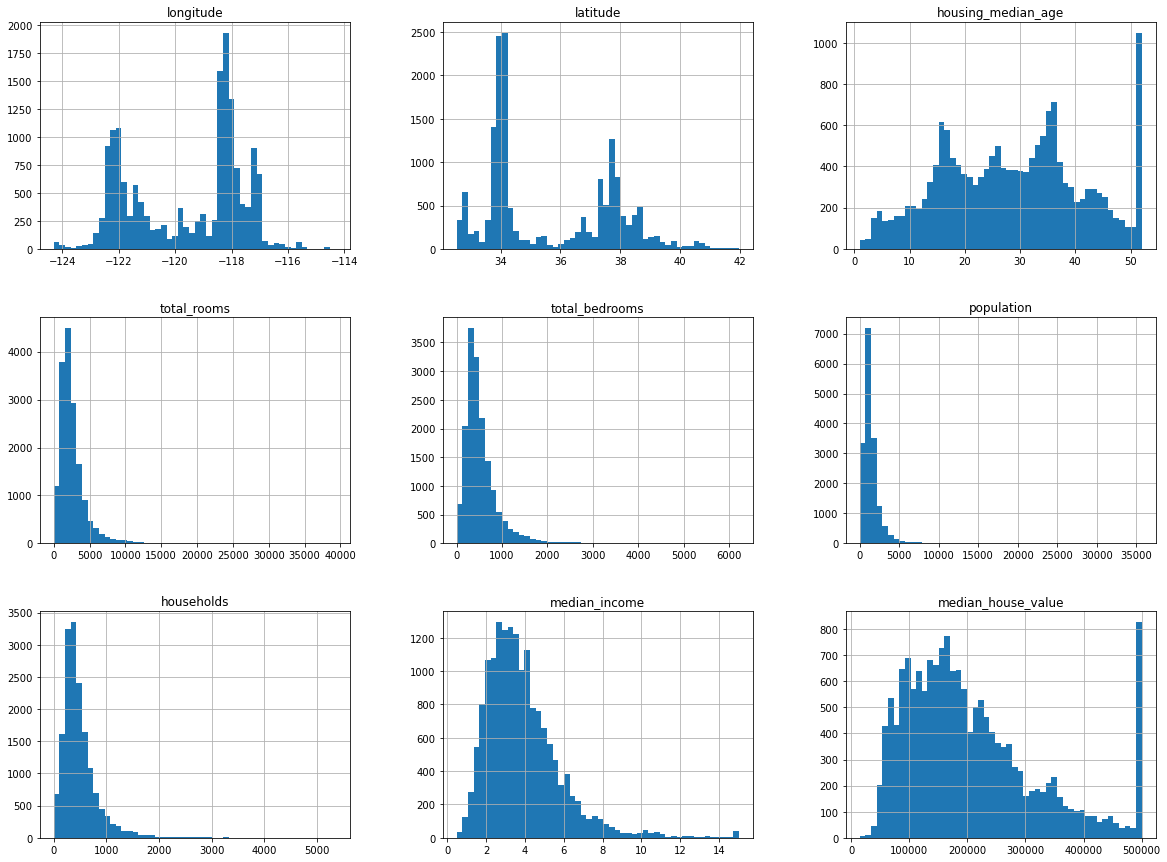

In [20]:
%matplotlib inline 
# to tell Jupyter to set up Matplotlib so it uses Jupyter's own graphical backend (page 50)
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) # to create histograms for each numerical parameter
plt.show()

## Create a Test Set

In [4]:
import numpy as np

def split_train_test(data, test_ratio):
    np.random.seed(42) # to keep the same test set's examples
    shuffled_indices = np.random.permutation(len(data)) # to shuffle the indices of the elements of the dataset
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size] # to set the test set with test_ratio% of the data
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices] # a tuple with the train and test examples
                                                             # iloc gets rows (or columns) at particular positions in the index 
                                                             # (so it only takes integers)

In [7]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [8]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_set_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio)) # to apply a function to the Series
                                                                         # returns a CRC value for each value
    return data.loc[~in_test_set], data.loc[in_test_set] # loc gets rows (or columns) with particular labels from the index.

In [9]:
housing_with_id = housing.reset_index() # adds as 'index' column
train_set, test_set = split_train_set_by_id(housing_with_id, 0.2, "index")

In [10]:
housing_with_id["id"] = housing["latitude"] + housing["longitude"] * 1000 # calculates an immutable index
train_set, test_set = split_train_set_by_id(housing_with_id, 0.2, "id") 

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42) # to easily divide the dataset
# I can pass multiple datasets with same  number of rows and it will split them on the same indices

<AxesSubplot:>

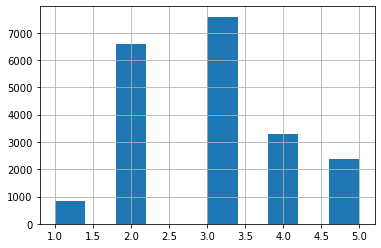

In [12]:
housing["income_cat"] = pd.cut(housing["median_income"],
                             bins=[0, 1.5, 3.0, 4.6, 6., np.inf],
                             labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist() # since the median_income is a useful data I want to implement a stratified sampling
                             # based on that cathegory -> no sampling bias

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # provides train/test indices to split data in train/test sets
for train_index, test_index in split.split(housing, housing["income_cat"]): # generate indices to split data into training and test set.
    # print(train_index, " ", test_index)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
for val in strat_test_set["income_cat"].value_counts():
    print(val, " / ", len(strat_test_set), " = ", val / len(strat_test_set))

1517  /  4128  =  0.36749031007751937
1316  /  4128  =  0.3187984496124031
658  /  4128  =  0.15939922480620156
473  /  4128  =  0.11458333333333333
164  /  4128  =  0.03972868217054264


In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True) # the DataFrame returns at its original state
    x = set_

x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11365,-117.95,33.74,16.0,2768.0,600.0,1182.0,563.0,3.7162,201200.0,<1H OCEAN
20458,-118.77,34.28,27.0,1416.0,251.0,1024.0,268.0,5.1074,185200.0,<1H OCEAN
16076,-122.48,37.74,52.0,2166.0,423.0,1072.0,370.0,4.1310,314300.0,NEAR OCEAN
4986,-118.30,34.00,52.0,1718.0,354.0,1026.0,312.0,2.0000,128000.0,<1H OCEAN
3359,-120.64,40.41,50.0,1741.0,424.0,987.0,383.0,1.5066,59300.0,INLAND


# Discover and Visualize the Data to Gain Insights

In [16]:
housing = strat_train_set.copy() # to copy the trainset not to compromise the original one

### Visualizing Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

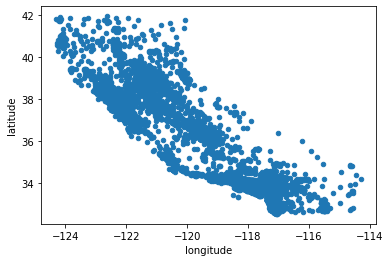

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

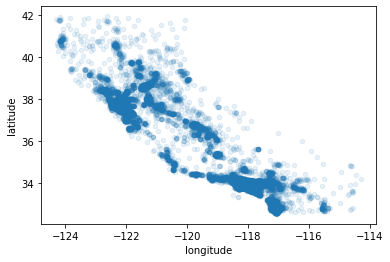

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1) # alpha to visualize beter where there's an high density of points

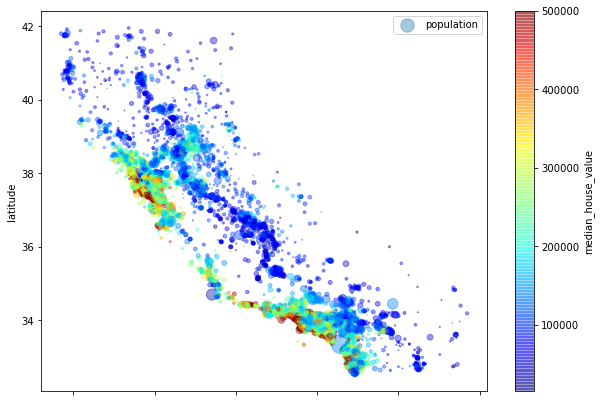

In [21]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
            s=housing["population"]/100, label="population", figsize=(10,7),
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
""" s: district's population
    c: the price
    cmap: the color map"""
plt.legend()

### Looking for Correlations

In [22]:
corr_matrix = housing.corr() # standard correlation coefficient (Pearson's r): linear correlations

In [23]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690931
total_rooms           0.131721
housing_median_age    0.109157
households            0.062866
total_bedrooms        0.046003
population           -0.026658
longitude            -0.053456
latitude             -0.136914
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

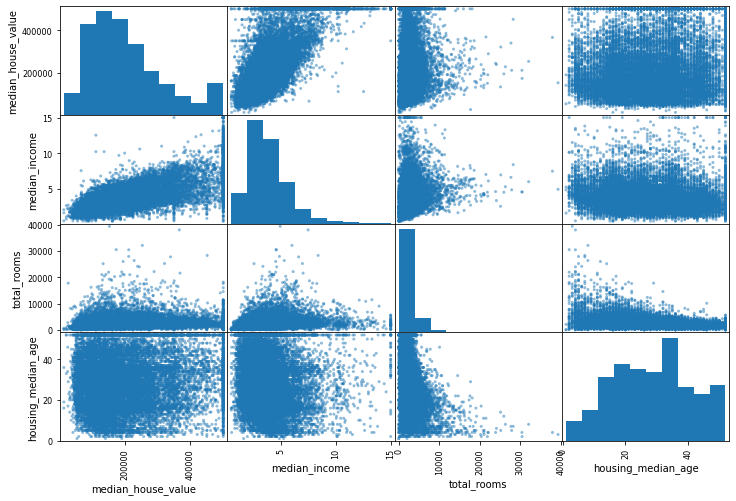

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

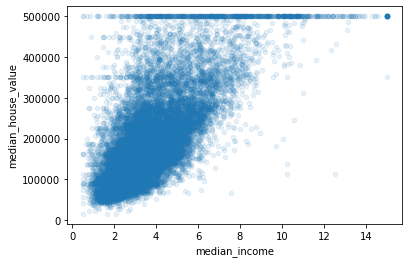

In [25]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", 
             alpha=0.1) # the most promising correlated attribute is median_incom for median_house_value

# the correlation is indeed very strong; there's an upward trend and points are not too dispersed

### Experimenting with Attribute Combinations

In [26]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [27]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690931
rooms_per_household         0.146786
total_rooms                 0.131721
housing_median_age          0.109157
households                  0.062866
total_bedrooms              0.046003
population_per_household   -0.022046
population                 -0.026658
longitude                  -0.053456
latitude                   -0.136914
bedrooms_per_room          -0.265794
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithms

In [28]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop() creates a copy w/out affecting strat_train_set
housing_labels = strat_train_set["median_house_value"].copy()

### Data Cleaning

In [ ]:
housing.dropna(subset=["total_bedrooms"]) # get rid of district where the value is missing
housing.drop("total_bedrooms", axis=1) # get rid of the whole attribute
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True) # fill the Nan values with something (the median)

In [29]:
from sklearn.impute import SimpleImputer # class to handle missing values

imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1) # makes a copy dropping the only not-numerical attributes

imputer.fit(housing_num) # computes the median of each attribute and stored the result in its statistic_ attribute

print(imputer.statistics_)
print(housing_num.median().values)

[-118.5      34.26     29.     2124.      433.     1167.      409.
    3.5341]
[-118.5      34.26     29.     2124.      433.     1167.      409.
    3.5341]


In [30]:
X = imputer.transform(housing_num) # transforms the train set by replacing missing values with learned medians
                                   # @return: plain NumPy array w/ the transformed features

housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                          index=housing_num.index) # puts it back into pandas DataFrame

### Handling Text and Categorical Attributes

In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
20449,<1H OCEAN
11274,<1H OCEAN
16581,INLAND
2659,<1H OCEAN
11053,<1H OCEAN
7183,<1H OCEAN
13346,INLAND
9207,INLAND
19422,INLAND
2984,INLAND


In [32]:
from sklearn.preprocessing import OrdinalEncoder # to convert cathegories from text to numbers
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [33]:
ordinal_encoder.categories_ # 1D array of categories for each categorical attribute

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

Better practice: since each value is not much correlated to the others, I can create one binary attribute per category: one-hot vectors (1 if the value is X and 0 otherwise)

In [34]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [35]:
housing_cat_1hot.toarray() # to transform the SciPy sparse matrix in a Numpy array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [36]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [104]:
# EXPERIMENT TRYING TO CONVERT DATAFRAME ROW VALUES 
# https://stackoverflow.com/questions/44877874/change-row-values-in-specific-pandas-data-frame-column-with-python/44877919
for i in range(len(ordinal_encoder.categories_[0])):
    for index, row in housing_cat.iterrows():
        #print(ordinal_encoder.categories_[0], '\n')
        if row["ocean_proximity"] == ordinal_encoder.categories_[0]:
            #print(row["ocean_proximity"], '\n')
            row["ocean_proximity"] = i

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Custom Transformers

An example of a custom transformer based on Scikit-Learn. You need just to omplement fit() rby returning self, transform() and fit_transform()

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, 
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

### Feature Scaling

ML algorithms usually don't perform well with different scaled data. So there are two ways to act feature scaling:
- min-max scaling (normalization):
(X - min(X)) / (max(X) - min(X))
- standardization:
(X - mu(X)) / sigma(X)

### Transformation Pipelines

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# class to help with sequence of transformations: all but the last estimator must be transformers
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [41]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # list of numerical column names
cat_attribs = ["ocean_proximity"] # list of categorical col names

# a class to apply the right transformations to each column
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(housing)

# Select and Train a Model

## Training and Evaluating on the Training Set

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [43]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

In [44]:
print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [210545.63580954 243156.44199124 144965.80301413 153440.224189
 224252.90011288]


In [45]:
print("Labels:", list(some_labels))

Labels: [182100.0, 173900.0, 147600.0, 74000.0, 212100.0]


In [46]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_mse = np.sqrt(lin_mse)
lin_mse  # typical underfitting case. The values are between 120k and 265k, so an error of 68k is not the best...

68175.51721127029

In [47]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)  # evaluating with DecisionTreeRegressor

DecisionTreeRegressor()

In [48]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

## Better Evaluation using Cross-Validation

In [53]:
from sklearn.model_selection import cross_val_score
# divides the training set into 10 distinct subsets --> folds ==> 
# it trains and evaluates the Decision Tree model 10 times picking a different fold for evaluation 
# every time and training on the other 9 folds
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [54]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70505.41555912 69243.34338716 68752.99162469 70458.60299547
 71792.04442895 71992.63703722 70041.69613002 71694.91454642
 70018.23839532 67321.74643807]
Mean: 70182.16305424445
Standard deviation: 1396.1146512641742


In [57]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, 
                         scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [68998.49548363 65233.23866446 65128.90124108 70551.6708298
 67457.64244344 71523.7626357  72446.5190945  69320.74271623
 67993.19243495 68021.62290798]
Mean: 68667.57884517632
Standard deviation: 2306.0147567982985


A better model: the Random Forest Regressor (anticipation of the Random Forest algorithm)

In [60]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

Save a Scikit-Learn model:

In [ ]:
import joblib

joblib.dump(my_model, "my_model.pkl")

model_loaded = joblib.load("my_model.pkl")

## Fine-Tune Your Model

### Grid Search

Use it when you have just few possible combinations

In [91]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels) # explores 2x6 + 1 = 13 different combos cv times

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64100.853892032625 {'max_features': 2, 'n_estimators': 3}
55330.42789941529 {'max_features': 2, 'n_estimators': 10}
52397.53687311379 {'max_features': 2, 'n_estimators': 30}
58814.0101613225 {'max_features': 4, 'n_estimators': 3}
52004.99256642384 {'max_features': 4, 'n_estimators': 10}
50037.631468255844 {'max_features': 4, 'n_estimators': 30}
58269.51844807569 {'max_features': 6, 'n_estimators': 3}
51570.21965074612 {'max_features': 6, 'n_estimators': 10}
49397.87772206986 {'max_features': 6, 'n_estimators': 30}
58247.16033337051 {'max_features': 8, 'n_estimators': 3}
51753.12476491977 {'max_features': 8, 'n_estimators': 10}
49440.38397012469 {'max_features': 8, 'n_estimators': 30}
62558.06798505603 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54010.00637540131 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60570.30091900242 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51994.70678947924 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

In [93]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.03071756e-02, 7.02982977e-02, 4.21128634e-02, 1.78255255e-02,
       1.64210322e-02, 1.83489050e-02, 1.71692104e-02, 3.35655589e-01,
       6.62476232e-02, 1.03655750e-01, 6.67227146e-02, 1.49615864e-02,
       1.41297685e-01, 8.78652162e-05, 2.77704928e-03, 6.11112709e-03])

### Randomize Search
Use it when you have a lot of possible combinations: it evaluates a given number of random combinations by selecting a random value for each hyperparameter at every iteration

### Ensemble Methods
Combine the models that perform best

### Analyze the Best Models and Their Errors
Gain insights by analyzing the best models

## Evaluate Your System on the Test Set

In [65]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [66]:
from scipy import stats 
confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors))) # to have an idea of how precise this estimate is

array([48248.16735353, 52471.15015391])

# Exercises

1) Try a SVM regressor with various hyperparameters

In [68]:
from sklearn.svm import SVR
import joblib

lin_svm = SVR(kernel="linear", C=1.0)
lin_svm.fit(housing_prepared, housing_labels)  # evaluating with Support Vector Machine

joblib.dump(lin_svm, "linear_svm")

['linear_svm']

In [69]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kernel': ["linear"], 'C': [1, 2, 4, 6, 8]},
    {'kernel': ["rbf"], 'gamma': ["auto", "scale"]}
]
lin_svm = SVR()

grid_search = GridSearchCV(lin_svm, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels) 

GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [1, 2, 4, 6, 8], 'kernel': ['linear']},
                         {'gamma': ['auto', 'scale'], 'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
Y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [72]:
from scipy import stats 
confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) -1, 
                         loc=squared_errors.mean(), 
                         scale=stats.sem(squared_errors))) # to have an idea of how precise this estimate is

array([82064.17628653, 87710.14446757])

In [75]:
negative_mse = grid_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

87331.14468310389

That's much worse than the RandomForestRegressor. Let's check the best hyperparameters found:

In [76]:
grid_search.best_params_

{'C': 8, 'kernel': 'linear'}

The linear kernel seems better than the RBF kernel. Notice that the value of C is the maximum tested value. When this happens you definitely want to launch the grid search again with higher values for C (removing the smallest values), because it is likely that higher values of C will be better.

2) Try replacing GridSearchCV with RandomizedSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV
# not all parameter values are tried out, 
# but rather a fixed number of parameter settings is sampled from the specified distributions. 
# The number of parameter settings that are tried is given by n_iter (by default = 10).
from scipy.stats import expon, reciprocal

# see https://docs.scipy.org/doc/scipy/reference/stats.html
# for `expon()` and `reciprocal()` documentation and more probability distribution functions.

# Note: gamma is ignored when kernel is "linear"
param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

rand_search = RandomizedSearchCV(lin_svm, param_distribs, cv=5, 
                           scoring='neg_mean_squared_error',
                          return_train_score=True)

rand_search.fit(housing_prepared, housing_labels) 

joblib.dump(grid_search, "grid_search")
joblib.dump(rand_search, "rand_search")

['rand_search']



The best model achieves the following score (evaluated using 5-fold cross validation):


In [83]:
negative_mse = rand_search.best_score_
rmse = np.sqrt(-negative_mse)
rmse

57488.75836187965

In [84]:
rand_search.best_params_

{'C': 144651.35212262784, 'gamma': 0.8478901299758477, 'kernel': 'rbf'}

Let's look at the exponential distribution we used, with scale=1.0. Note that some samples are much larger or smaller than 1.0, but when you look at the log of the distribution, you can see that most values are actually concentrated roughly in the range of exp(-2) to exp(+2), which is about 0.1 to 7.4.

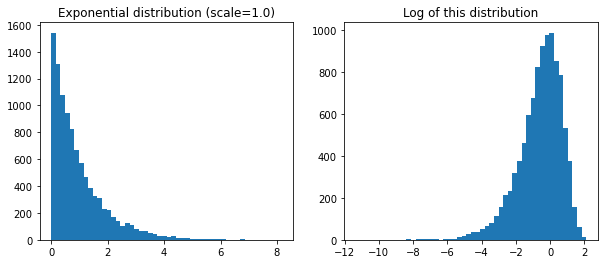

In [85]:
expon_distrib = expon(scale=1.)
samples = expon_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Exponential distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The distribution we used for C looks quite different: the scale of the samples is picked from a uniform distribution within a given range, which is why the right graph, which represents the log of the samples, looks roughly constant. This distribution is useful when you don't have a clue of what the target scale is:

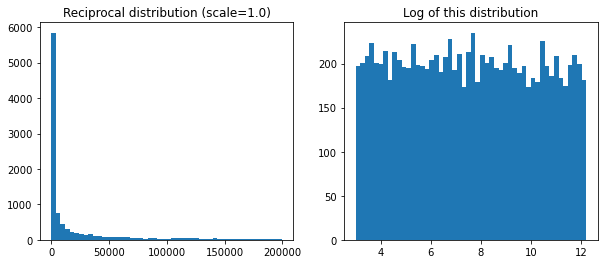

In [86]:
reciprocal_distrib = reciprocal(20, 200000)
samples = reciprocal_distrib.rvs(10000, random_state=42)
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("Reciprocal distribution (scale=1.0)")
plt.hist(samples, bins=50)
plt.subplot(122)
plt.title("Log of this distribution")
plt.hist(np.log(samples), bins=50)
plt.show()

The reciprocal distribution is useful when you have no idea what the scale of the hyperparameter should be (indeed, as you can see on the figure on the right, all scales are equally likely, within the given range), whereas the exponential distribution is best when you know (more or less) what the scale of the hyperparameter should be.

3) add a transformer in the preparation pipeline to select only the most important attributes

In [87]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X[:, self.feature_indices_]

In [88]:
k = 5



Now let's look for the indices of the top k features:




In [94]:

top_k_feature_indices = indices_of_top_k(feature_importances, k)
top_k_feature_indices

array([ 0,  1,  7,  9, 12])

In [95]:
np.array(attributes)[top_k_feature_indices]

IndexError: index 7 is out of bounds for axis 0 with size 4

In [96]:
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.0803071755554691, 'median_house_value'),
 (0.07029829770298544, 'median_income'),
 (0.042112863440353344, 'total_rooms'),
 (0.017825525509682683, 'housing_median_age')]

In [97]:
preparation_and_feature_selection_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

In [98]:
housing_prepared_top_k_features = preparation_and_feature_selection_pipeline.fit_transform(housing)



Let's look at the features of the first 3 instances:


In [99]:
housing_prepared_top_k_features[0:3]

array([[ 0.34656365, -0.63356227,  0.09196914,  0.06693505,  0.        ],
       [ 0.79098809, -0.86786978, -0.4036929 , -0.0749146 ,  0.        ],
       [-0.92678727,  0.99721796, -0.12691101, -0.01487294,  1.        ]])

4) Try creating a single pipeline that does the full data preparation plus the final prediction.

In [101]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rand_search.best_params_))
])

In [102]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                    

In [103]:
some_data = housing.iloc[:4]
some_labels = housing_labels.iloc[:4]

print("Predictions:\t", prepare_select_and_predict_pipeline.predict(some_data))
print("Labels:\t\t", list(some_labels))

Predictions:	 [185294.49958255 218816.12543727 144388.26482533  79515.73344898]
Labels:		 [182100.0, 173900.0, 147600.0, 74000.0]


5) Automatically explore some preparation options using GridSearchCV

In [ ]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(1, len(feature_importances) + 1))
}]

grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  10.1s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.2s remaining:    0.0s


[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  10.6s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  10.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  10.0s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=mean, total=  10.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=  10.2s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__imputer__strategy=median, total=  10.6s
[CV] feature_selection__k=1, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=1, preparation__num__

[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=  11.8s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=  11.9s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=median, total=  11.6s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=  11.5s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=  11.7s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=4, preparation__num__imputer__strategy=most_frequent, total=  11.9s
[CV] feature_selection__k=4, preparation__num__imputer__strategy=

[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=  21.6s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=  20.8s
[CV] feature_selection__k=7, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=7, preparation__num__imputer__strategy=most_frequent, total=  20.4s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  35.9s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  29.3s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=  28.1s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature

[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  59.9s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total= 1.2min
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=mean, total=  57.3s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total= 1.1min
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total= 1.0min
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total= 1.1min
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, p

[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total= 1.5min
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total= 1.7min
[CV] feature_selection__k=14, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=median, total= 1.7min
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total= 1.3min
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total= 1.6min
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total= 1.5min
[CV] feature_selection__k=14, preparation__num__impute

In [ ]:
grid_search_prep.best_params_